<a href="https://colab.research.google.com/github/carlosdgerez/machine_learning/blob/main/module4/Copy_of_Final_of_Porter_Bike_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# initial data

In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [17]:
bikes = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv")

In [12]:
bikes2  = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv")

In [ ]:
bikes2

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
0,12/1/12,4,0,0,0,1,0.81,0,4.22,3.9980
1,12/1/12,4,1,0,0,1,0.81,0,4.22,3.9980
2,12/1/12,4,2,0,0,2,0.81,0,4.22,3.9980
3,12/1/12,4,3,0,0,2,0.81,9,4.22,1.9982
4,12/1/12,4,4,0,0,1,0.81,6,4.22,3.0014
...,...,...,...,...,...,...,...,...,...,...
737,12/31/12,1,19,0,1,2,0.60,11,4.22,1.0016
738,12/31/12,1,20,0,1,2,0.60,11,4.22,1.0016
739,12/31/12,1,21,0,1,1,0.60,11,4.22,1.0016
740,12/31/12,1,22,0,1,1,0.56,9,4.22,1.9982


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [18]:
bikes = pd.DataFrame(bikes)


In [19]:
bikes

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,11/30/12,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,11/30/12,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,11/30/12,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,11/30/12,4,22,0,1,1,0.75,0,6.10,5.9978,18,145


# Kates sample data

In [16]:
def wrangle_data(data):
  # Data wrangling
  data.isna().sum()
  data=data.dropna()
  
  # rename the columns as the one in clean data to use merge by this column
  data.rename(columns={'hum': 'humidity_percentage'}, inplace = True)
  data.rename(columns={'temp_c': 'temperature_celsius'}, inplace = True)
  data.rename(columns={'feels_like_c': 'feels_like_temperature_celsius'}, inplace = True)
  
  
  # remove timestamp on training data 
  data['date'] = pd.to_datetime(data['dteday'])
  # month
  data['month'] = pd.DatetimeIndex(data['date']).month
  # week day name
  data['day_name'] = pd.DatetimeIndex(data['date']).day_name()
  # day of year
  data['day_of_year'] = pd.DatetimeIndex(data['date']).dayofyear

  # day of the week
  data['day'] = pd.DatetimeIndex(data['date']).day
  # day of week
  data['dayofweek'] = pd.DatetimeIndex(data['date']).dayofweek
  
  data['date'] = (data['date'] - pd.to_datetime('1/1/2011') )/ np.timedelta64(1,'D')

  # One hot encoding
  # weathersit weathersit : - 1: Clear, Few clouds, Partly cloudy, Partly cloudy ,- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist , - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds , - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
  data['weathersit']=data['weathersit'].map({1:'clear', 2:'mist_cloudy', 3:'light_rain_snow', 4:'heavy_rain_snow'})

  # Get target feature
  try:
    data['target'] = data['casual'] + data['registered']
  except:
    y = 1+1
    
  
  df = pd.get_dummies(data, columns = ['weathersit', 'day_name', 'month','holiday','workingday', 'hr','season','dayofweek'])

  drop_features = ['dteday', 'casual', 'registered']
  try:
    df = df.drop(columns=drop_features)
  except:
    df = df.drop(columns=['dteday'])
  
  # exclude outliers from the data
  # data = df[(df['feels_like_temperature_celsius'] <= 44.9972) & (df['temperature_celsius'] <= 37.12)]
  data = df

  return data

In [20]:
bikes3 = wrangle_data(bikes)
# bikes.info()
# bikes4  = pd.read_csv("https://raw.githubusercontent.com/carlosdgerez/machine_learning/main/module4/katesbikes.csv")

In [25]:
bikes3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16637 entries, 0 to 16636
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   humidity_percentage             16637 non-null  float64
 1   windspeed                       16637 non-null  int64  
 2   temperature_celsius             16637 non-null  float64
 3   feels_like_temperature_celsius  16637 non-null  float64
 4   date                            16637 non-null  float64
 5   day_of_year                     16637 non-null  int64  
 6   day                             16637 non-null  int64  
 7   weathersit_clear                16637 non-null  uint8  
 8   weathersit_heavy_rain_snow      16637 non-null  uint8  
 9   weathersit_light_rain_snow      16637 non-null  uint8  
 10  weathersit_mist_cloudy          16637 non-null  uint8  
 11  day_name_Friday                 16637 non-null  uint8  
 12  day_name_Monday                 

In [26]:
# move the target to the final line 
column_to_move = bikes3.pop("target")

# insert column with insert(location, column_name, column_value)
bikes3.insert(bikes3.shape[1], "target", column_to_move)          

In [ ]:
# debugging just trying deleting the objects
# bikes3 = bikes3.drop(['date'], axis=1)


In [27]:
bikes3

,humidity_percentage,windspeed,temperature_celsius,feels_like_temperature_celsius,date,day_of_year,day,weathersit_clear,weathersit_heavy_rain_snow,weathersit_light_rain_snow,...,season_3,season_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,target
0,0.81,0,3.28,3.0014,0.0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,16
1,0.80,0,2.34,1.9982,0.0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,40
2,0.80,0,2.34,1.9982,0.0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,32
3,0.75,0,3.28,3.0014,0.0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,13
4,0.75,0,3.28,3.0014,0.0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,0.66,0,7.04,7.0010,699.0,335,30,1,0,0,...,0,1,0,0,0,0,1,0,0,377
16633,0.66,0,7.04,7.0010,699.0,335,30,1,0,0,...,0,1,0,0,0,0,1,0,0,245
16634,0.75,6,6.10,5.0012,699.0,335,30,1,0,0,...,0,1,0,0,0,0,1,0,0,183
16635,0.75,0,6.10,5.9978,699.0,335,30,1,0,0,...,0,1,0,0,0,0,1,0,0,163


In [38]:
# dividing the set
#train_dataset = bikes3.sample(frac=0.8, random_state=0)
#test_dataset = bikes3.drop(train_dataset.index)
train_dataset = bikes3[bikes3.month_11 != 1]
test_dataset = bikes3 [bikes3.month_11 == 1]

In [39]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 7185 to 16636
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   humidity_percentage             1437 non-null   float64
 1   windspeed                       1437 non-null   int64  
 2   temperature_celsius             1437 non-null   float64
 3   feels_like_temperature_celsius  1437 non-null   float64
 4   date                            1437 non-null   float64
 5   day_of_year                     1437 non-null   int64  
 6   day                             1437 non-null   int64  
 7   weathersit_clear                1437 non-null   uint8  
 8   weathersit_heavy_rain_snow      1437 non-null   uint8  
 9   weathersit_light_rain_snow      1437 non-null   uint8  
 10  weathersit_mist_cloudy          1437 non-null   uint8  
 11  day_name_Friday                 1437 non-null   uint8  
 12  day_name_Monday               

In [40]:
# generating train and test features and labels

train_features = train_dataset.copy()
test_features = test_dataset.copy()


train_labels = train_features.pop('target')
test_labels = test_features.pop('target')


# Start working with the model

It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial.

### The Normalization layer

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [41]:
normalizer = tf.keras.layers.Normalization(axis=-1)



Create a two-step Keras Sequential model again with the first layer being `normalizer` (`tf.keras.layers.Normalization(axis=-1)`) you defined earlier and adapted to the whole dataset:

In [42]:
normalizer.adapt(np.array(train_features))

In [ ]:
"""linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=32, activation= 'relu', input_shape=(27,)),
    layers.Dropout(0.2),
    layers.Dense(units=32, activation= 'relu'),
    # layers.Dense(units=32, activation= 'relu'),
    layers.Dense(1)
])"""

In [43]:
# create the model sequential with the normalizer as first layer
# the input should be the number of columns in this case, not the samples.
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=256, activation='relu', input_shape=(38,)),
    layers.Dropout(0.5),
    layers.Dense(units=128, activation= 'relu'),
    layers.Dropout(0.2),
   layers.Dense(units=32, activation='relu'),
    layers.Dense(1)
])

When you call `Model.predict` on a batch of inputs, it produces `units=1` outputs for each example:

In [44]:
linear_model.predict(train_features[:10])

array([[0.645],
       [0.375],
       [0.65 ],
       [0.638],
       [0.231],
       [0.673],
       [0.627],
       [0.785],
       [0.746],
       [0.647]], dtype=float32)

## RMSPROP

In [ ]:
# early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=30)

# linear_model.compile(
#     optimizer=tf.keras.optimizers.RMSprop(
#         learning_rate=0.001,
#         rho=0.9,
#         momentum=0.2,
#         epsilon=1e-07,
#         centered=False,
#         name='RMSprop'
#     ), 
#     loss='mean_absolute_error'
# )

## ADAM

In [ ]:
"""
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=10e-3),
    loss='mean_absolute_error')"""

In [45]:

#Compile the model with Adam optimizer
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

# MODEL FIT

In [46]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=1200,
    batch_size=100,
    # callbacks=[early_stop],
    # allow logging.
    verbose=2,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/1200
122/122 - 2s - loss: 106.7656 - val_loss: 109.5457 - 2s/epoch - 13ms/step
Epoch 2/1200
122/122 - 0s - loss: 51.6687 - val_loss: 79.4374 - 362ms/epoch - 3ms/step
Epoch 3/1200
122/122 - 0s - loss: 42.4011 - val_loss: 71.7424 - 357ms/epoch - 3ms/step
Epoch 4/1200
122/122 - 0s - loss: 38.5719 - val_loss: 66.5693 - 368ms/epoch - 3ms/step
Epoch 5/1200
122/122 - 0s - loss: 36.3966 - val_loss: 61.4072 - 338ms/epoch - 3ms/step
Epoch 6/1200
122/122 - 0s - loss: 35.1066 - val_loss: 60.2257 - 351ms/epoch - 3ms/step
Epoch 7/1200
122/122 - 0s - loss: 33.7774 - val_loss: 60.2481 - 344ms/epoch - 3ms/step
Epoch 8/1200
122/122 - 0s - loss: 33.7416 - val_loss: 55.8374 - 339ms/epoch - 3ms/step
Epoch 9/1200
122/122 - 0s - loss: 32.9035 - val_loss: 56.3170 - 346ms/epoch - 3ms/step
Epoch 10/1200
122/122 - 0s - loss: 32.2840 - val_loss: 54.7305 - 348ms/epoch - 3ms/step
Epoch 11/1200
122/122 - 0s - loss: 31.7894 - val_loss: 51.3423 - 357ms/epoch - 3ms/step
Epoch 12/1200
122/122 - 0s - loss: 31.811

KeyboardInterrupt: ignored

Visualize the model's training progress using the stats stored in the `history` object:

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
1195,27.223249,26.169348,1195
1196,26.653641,25.177425,1196
1197,27.288191,25.228367,1197
1198,26.761158,24.669395,1198
1199,27.069773,24.562809,1199


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xscale('log')
  plt.xlim([1, 1200])
  plt.ylim([20, 85])
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.legend()
  plt.grid(True)

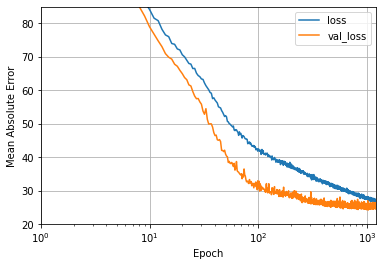

In [ ]:
plot_loss(history)

In [ ]:
# test_results = {}

# test_results['bikes_evaluation'] = linear_model.evaluate(
#     test_features,
#     test_labels, verbose=2)
# predictions = linear_model.predict(test_features)
# predictionsDataframe = pd.DataFrame(predictions)
# test_labelsDataFrame = pd.DataFrame(test_labels).reset_index()
# comparativeFrame = test_labelsDataFrame.join(predictionsDataframe)
# comparativeFrame

In [ ]:
from sklearn import metrics as sm
predictions = linear_model.predict(test_features)

print("Mean absolute error", round(sm.mean_absolute_error(test_labels, predictions), 2))
print("Mean squared error", round(sm.mean_squared_error(test_labels, predictions), 2))
print("Median absolute error", round(sm.median_absolute_error (test_labels, predictions), 2))
print("Explain variance score", round(sm.explained_variance_score(test_labels, predictions), 2))
print("R2 score", round(sm.r2_score(test_labels, predictions), 4))
print("Root Mean Squared error", round(sm.mean_squared_error(test_labels, predictions, squared = False), 4))

Mean absolute error 23.58
Mean squared error 1442.92
Median absolute error 14.41
Explain variance score 0.96
R2 score 0.9547
Root Mean Squared error 37.9857


# Holdout Set

In [ ]:
bikes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        742 non-null    object 
 1   season        742 non-null    int64  
 2   hr            742 non-null    int64  
 3   holiday       742 non-null    int64  
 4   workingday    742 non-null    int64  
 5   weathersit    742 non-null    int64  
 6   hum           742 non-null    float64
 7   windspeed     742 non-null    int64  
 8   temp_c        742 non-null    float64
 9   feels_like_c  742 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 58.1+ KB


In [ ]:

holdout_set = wrangle_data(bikes2)
holdout_set["heavy_rain_snow"] = 0
heavy_rain_snow_col = holdout_set.pop("heavy_rain_snow")
holdout_set.insert(14, "heavy_rain_snow", heavy_rain_snow_col)
holdout_set.info()
predictions = linear_model.predict(holdout_set)

csv_df = pd.DataFrame(predictions)
csv_file = csv_df.to_csv("predictions.csv")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 741
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   season                          742 non-null    int64  
 1   hr                              742 non-null    int64  
 2   holiday                         742 non-null    int64  
 3   workingday                      742 non-null    int64  
 4   humidity_percentage             742 non-null    float64
 5   windspeed                       742 non-null    int64  
 6   temperature_celsius             742 non-null    float64
 7   feels_like_temperature_celsius  742 non-null    float64
 8   date                            742 non-null    float64
 9   month                           742 non-null    int64  
 10  day_of_year                     742 non-null    int64  
 11  day                             742 non-null    int64  
 12  dayofweek                       742 

In [ ]:
predictions= linear_model.predict(test_features)
prediction = pd.DataFrame(predictions)
labels = pd.DataFrame(test_labels).reset_index(drop=True)
residuals = prediction[0] - labels.target
residual = pd.DataFrame(residuals)
residual['percents_residuals'] = (prediction[0])/labels.target

residual.percents_residuals.value_counts()
residual.drop(0, inplace=True, axis=1)

import altair as alt
#alt.themes.enable('fivethirtyeight')
alt.Chart(residual).mark_bar().encode(
    alt.X('percents_residuals:Q', axis=alt.Axis(title=''),bin=alt.Bin(maxbins=105), scale=alt.Scale(domain=(-4,10)) ),
    y='count()'
).configure_axis(grid=False)

alt.Chart(...)

In [ ]:
residual.describe()

,percents_residuals
count,3327.000000
mean,1.001671
std,0.463163
min,0.069334
25%,0.822624
50%,0.961751
75%,1.083577
max,6.677733


In [ ]:
# download the file to the user computer current directory
from google.colab import files

files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>